# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Tushar Sharma

Datum: 17.11.2023

Gruppe: 10

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie lange dauert es bis wärme Wasser die Umgebungstemperatur erreicht?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="setup_newton/setup_newton.jpeg" width="800">

Ich habe 250g wärme Wasser in eine Transparent tasse genommen und eine Temperatur Sensor dort rein gemacht . Zweite Temperatur Sensor habe ich in Umgebung gelassen.

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = 'setup_newton/setup_newton.h5'

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
#setting variables to datasets
with h5py.File(path) as f:
    Umgebung_temp = f['RawData']['1ee7e430-1e33-61a4-864b-e8a8f617a28f']['temperature'][()]
    Wasser_temp = f['RawData']['1ee7e433-83d9-666d-acc3-1f5300b8a1d8']['temperature'][()]
    Time_stamp = f['RawData']['1ee7e430-1e33-61a4-864b-e8a8f617a28f']['timestamp'][()]

#close hdf file
f.close()


Temperatur_diff = Wasser_temp - Umgebung_temp #Temperature difference 
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

(0.0, 670.2099327087402)

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


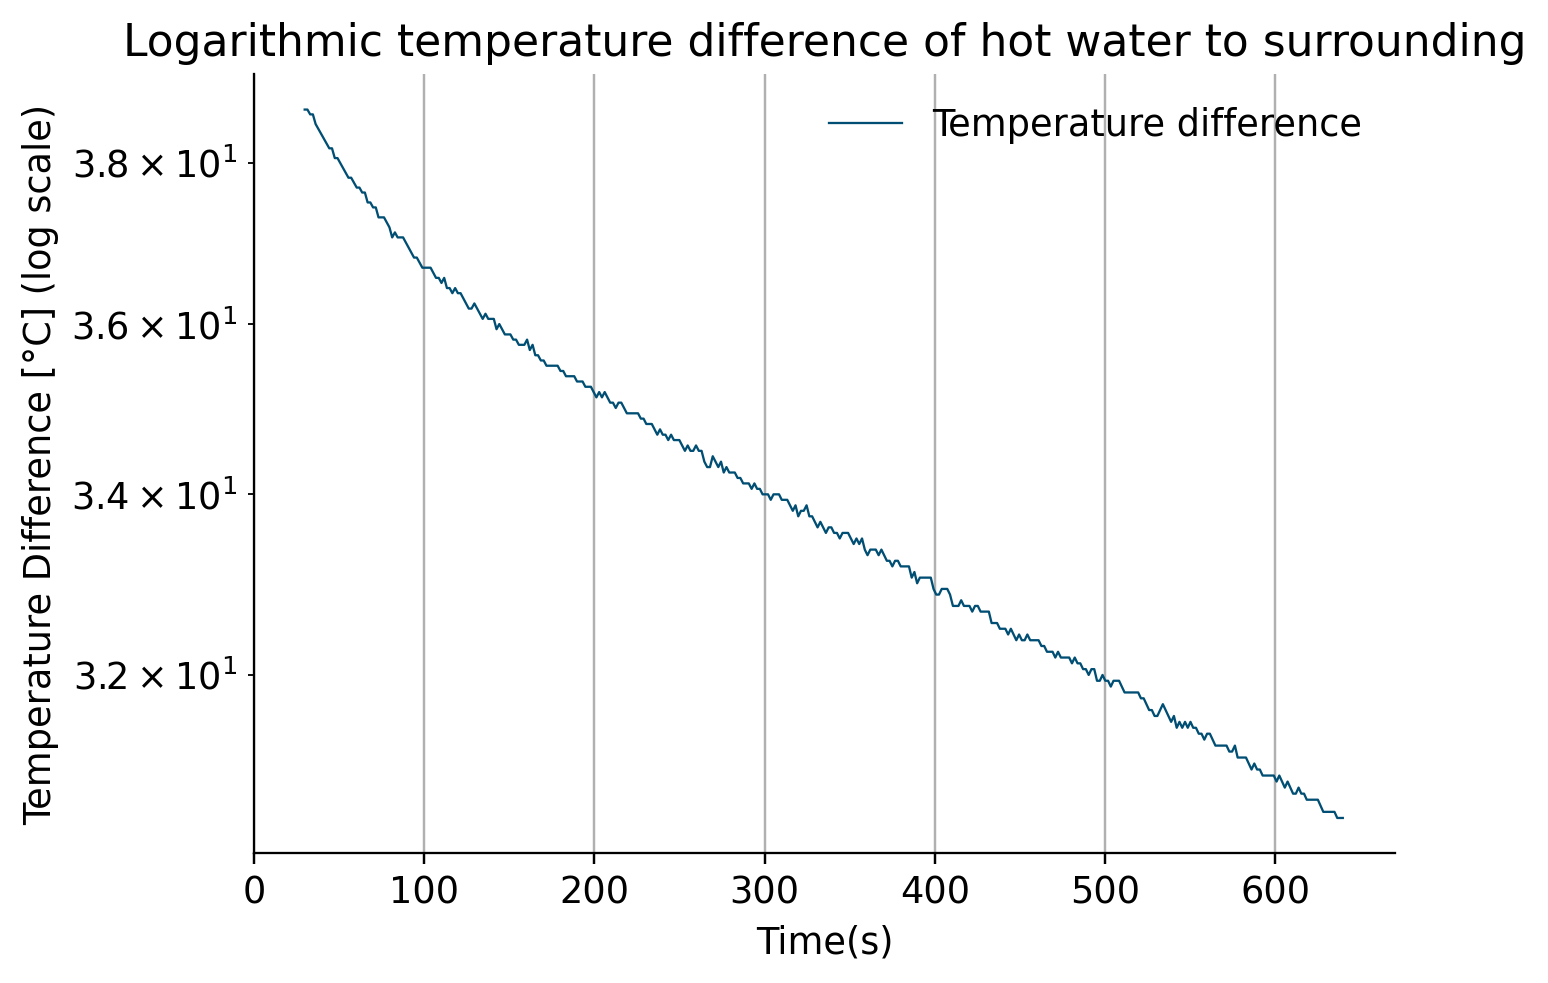

In [4]:
# TODO: Use the temperature and time data for plotting

#plotting logarithmic temperature difference with respect to time
plt.semilogy(Time_stamp,Temperatur_diff,label = 'Temperature difference')
plt.xlabel('Time(s)')
plt.ylabel('Temperature Difference [°C] (log scale)')
plt.legend()
plt.grid(True)

#Graph mit Farbe und Titel
plt.rcParams['axes.facecolor'] = '#f2f2f2'  # Background color
plt.rcParams['axes.edgecolor'] = 'black'     # Border color
plt.rcParams['grid.color'] = 'white' 
plt.title('Logarithmic temperature difference of hot water to surrounding')
plt.xlim(0)
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [5]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz

#Setting variables to caculate coefficient K
with h5py.File(path) as f:
    T_1 = f['RawData']['1ee7e433-83d9-666d-acc3-1f5300b8a1d8']['temperature'][(0)] #Anfangstemperatur von warmes Wasser
    T_2 = f['RawData']['1ee7e430-1e33-61a4-864b-e8a8f617a28f']['temperature'][(-1)] #Endtemperatur von Umgebung

#Calculating ln(T(t) - T2) and ln(T1 - T2)
    ln_temperature_diff = np.log(Temperatur_diff - T_2)
    ln_temperature_range = np.log(T_1- T_2)

#Time
    time = f['RawData']['1ee7e430-1e33-61a4-864b-e8a8f617a28f']['timestamp'][()]

    
#close hdf file
f.close()

#Calculating coefficient K
K,_ = np.polyfit(time, ln_temperature_diff, 1) #using np.polyfit to calculate k

# DONE #

#### (iV) Ergebnis

In [6]:
# TODO: Print result
print(f"Transportkoeffizientwert der Newtonsche Abkühlung ist {K}")

# DONE #

Transportkoeffizientwert der Newtonsche Abkühlung ist -0.001263478929168865


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Experiment ist für 10 min gelaufen . Und durch alle gemmesene Werte, die ausgerechnete Transportkoeffizient wert ist -0.00126 . Die Temperatur Messung war nicht 100% genau . Bei mir lag bischen schwankungen und daher der wert kann nicht 100% richtig sein .Grund für schwankungen kann Unreinigung , Lüftung , Sensor mechanisumus und weitere faktoren sein. Aber der genauere Wert liegt ungefähr in nähe von meine berechnete wert . Ich kann nicht 100% das Newtonsche Abkühlungsgesetz bestätigen, da meine wert nicht genau ist.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich habe durch diese Experiment gelernt wie man die Messungen durchführt, mit Metadaten arbeitet und berechnungen mit hilfe Python durchführt. Experiment kann novh verbessrt werden durch viele faktoren um genaure Wert zu bekommen.